<a href="https://colab.research.google.com/github/RisalahNaufal/DATA-MINING_Clustering-Pada-Data-Customer-Menggunakan-Algoritma-K-Mean/blob/main/Clustering_K_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
nama_kolom = ['ID','Gender','Age','Income','Spending']

In [ ]:
df = pd.read_csv('Customers Cluster.csv')
df.head()

,ID,Gender,Age,Income,Spending
0,1,Female,47,600240,0.16
1,2,Male,60,150060,0.04
2,3,Male,63,240096,0.51
3,4,Male,48,270108,0.46
4,5,Female,35,105042,0.35


In [ ]:
df = df.drop(['ID'], axis=1)
df.head(10)

,Gender,Age,Income,Spending
0,Female,47,600240,0.16
1,Male,60,150060,0.04
2,Male,63,240096,0.51
3,Male,48,270108,0.46
4,Female,35,105042,0.35
5,Male,68,315126,0.43
6,Female,46,125050,0.05
7,Female,38,565226,0.91
8,Male,19,370148,0.10
9,Female,35,370148,0.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    200 non-null    object 
 1   Age       200 non-null    int64  
 2   Income    200 non-null    int64  
 3   Spending  200 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


In [ ]:
df['Gender'] = df['Gender'].replace({"Female":0,"Male":1})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    200 non-null    int64  
 1   Age       200 non-null    int64  
 2   Income    200 non-null    int64  
 3   Spending  200 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [ ]:
df.head(15)

,Gender,Age,Income,Spending
0,0,47,600240,0.16
1,1,60,150060,0.04
2,1,63,240096,0.51
3,1,48,270108,0.46
4,0,35,105042,0.35
5,1,68,315126,0.43
6,0,46,125050,0.05
7,0,38,565226,0.91
8,1,19,370148,0.10
9,0,35,370148,0.72


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.440,0.497633,0.00,0.0000,0.0,1.00,1.00
Age,200.0,38.850,13.969007,18.00,28.7500,36.0,49.00,70.00
Income,200.0,302921.120,131376.135269,75030.00,207583.0000,307623.0,390156.00,685274.00
Spending,200.0,0.502,0.258235,0.01,0.3475,0.5,0.73,0.99


In [ ]:
df.isnull().sum()

Gender      0
Age         0
Income      0
Spending    0
dtype: int64

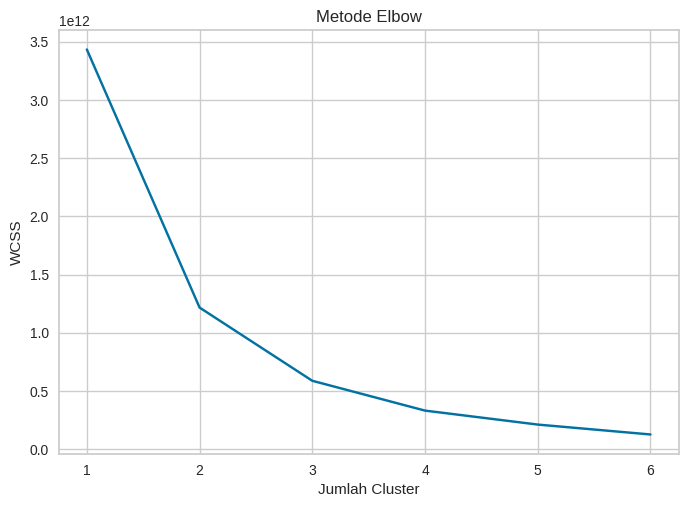

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<bound method Visualizer.poof of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=0),
                 k=(1, 10))>

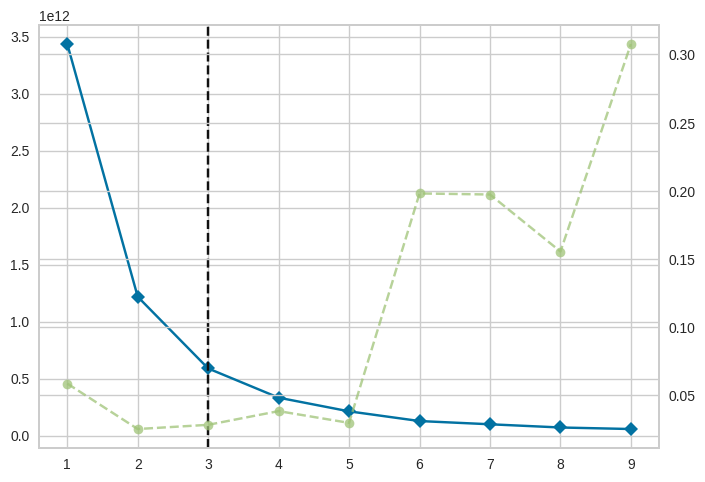

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
vis_elbow = KElbowVisualizer(kmeans, k = (1,10))
vis_elbow.fit(df)
vis_elbow.poof

In [ ]:
X_numerics = df[['Gender','Age','Income','Spending']]

In [ ]:
KM_5_clusters = KMeans(n_clusters=3, init='k-means++', n_init=10).fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

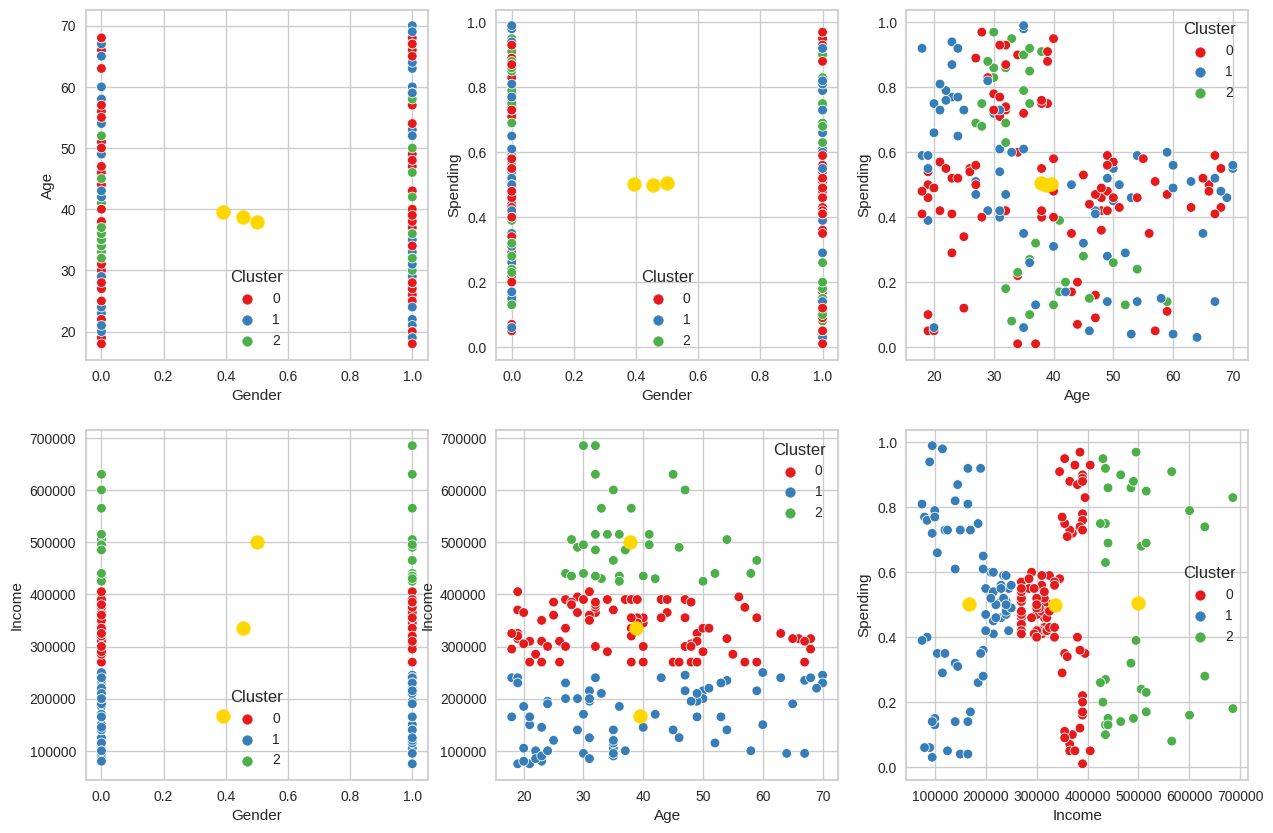

In [ ]:
fig1, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.scatterplot(x='Gender', y='Age', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[0, 0], legend='full')

sns.scatterplot(x='Gender', y='Income', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1, 0], legend='full')

sns.scatterplot(x='Gender', y='Spending', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[0, 1], legend='full')

sns.scatterplot(x='Age', y='Income', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1, 1], legend='full')

sns.scatterplot(x='Age', y='Spending', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[0, 2], legend='full')

sns.scatterplot(x='Income', y='Spending', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1, 2], legend='full')


axes[0, 0].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,1], marker='o', s=100, c="gold")
axes[1, 0].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='o', s=100, c="gold")
axes[0, 1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,3], marker='o', s=100, c="gold")
axes[1, 1].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='o', s=100, c="gold")
axes[0, 2].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,3], marker='o', s=100, c="gold")
axes[1, 2].scatter(KM_5_clusters.cluster_centers_[:,2],KM_5_clusters.cluster_centers_[:,3], marker='o', s=100, c="gold")
plt.show()
